In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style("whitegrid")
plt.rcParams.update({'font.size': 32})
sns.set_context("poster", rc={"font.size":34,"axes.titlesize":34,"axes.labelsize":34, "lines.linewidth": 2})  
plt.rcParams['figure.figsize'] = 18, 12

pd.options.display.max_columns = 999
pd.options.display.max_rows = 9999


from datetime import datetime
str(datetime.now())




'2018-08-02 11:07:29.627105'

In [19]:
df = pd.read_csv('../../../MyLake-Erie/IO/erie_eastern.txt', skiprows=1, delimiter='\t')

Estimate loads and compare with loading published

In [21]:
df.head()

,Year,Month,Day,GlobalRadiation,CloudCover,AirTemperature,RelativeHumidity,AirPressure,WindSpeed,Precipitation,InflowQ,InflowT,InflowC,POC,InflowTP,InflowDOP,InflowChla,DOC,DIC,O,NO3,NH4,SO4,Fe2,Ca2,pH,CH4aq,Fe3,Al3,FeS,CaCO3,CH4g,POP
0,1983,4,1,NaN,1.000,2.420833,70.9875,1015.229167,3.808333,0.0,20869289.41,2.01,0.1,100,451.8,89.98,0.1,89.98,0,15000,5000,0,20000,0,50,7,0,6.304421,52.011472,0,1000,0,361.82
1,1983,4,2,NaN,0.875,7.087500,77.7875,1011.562500,6.379167,10.4,22068111.43,1.13,0.1,100,925.0,184.72,0.1,184.72,0,15000,5000,0,20000,0,50,7,0,1.225794,10.112800,0,1000,0,740.28
2,1983,4,3,NaN,0.963,7.183333,87.4875,999.987500,4.158333,3.0,51500415.25,0.02,0.1,100,1144.0,228.60,0.1,228.60,0,15000,5000,0,20000,0,50,7,0,0.958871,7.910688,0,1000,0,915.40
3,1983,4,4,NaN,0.663,4.991667,85.6000,1011.545833,8.870833,0.0,61164388.65,1.28,0.1,100,656.6,130.92,0.1,130.92,0,15000,5000,0,20000,0,50,7,0,8.189045,67.559618,0,1000,0,525.68
4,1983,4,5,NaN,0.913,4.530435,80.5750,1021.156522,5.839130,0.6,49787812.36,1.15,0.1,100,266.4,52.78,0.1,52.78,0,15000,5000,0,20000,0,50,7,0,4.246317,35.032117,0,1000,0,213.62


In [22]:
df['Date'] = df.apply(lambda x:datetime.strptime("{0} {1} {2} 00:00:00".format(int(x['Year']),int(x['Month']), int(x['Day'])), "%Y %m %d %H:%M:%S"),axis=1)

In [23]:
df.set_index('Date', inplace=True)

In [25]:
df['TP_load'] = (df.InflowQ*df.InflowTP)

In [32]:
gdf = df.groupby(['Year']).sum()

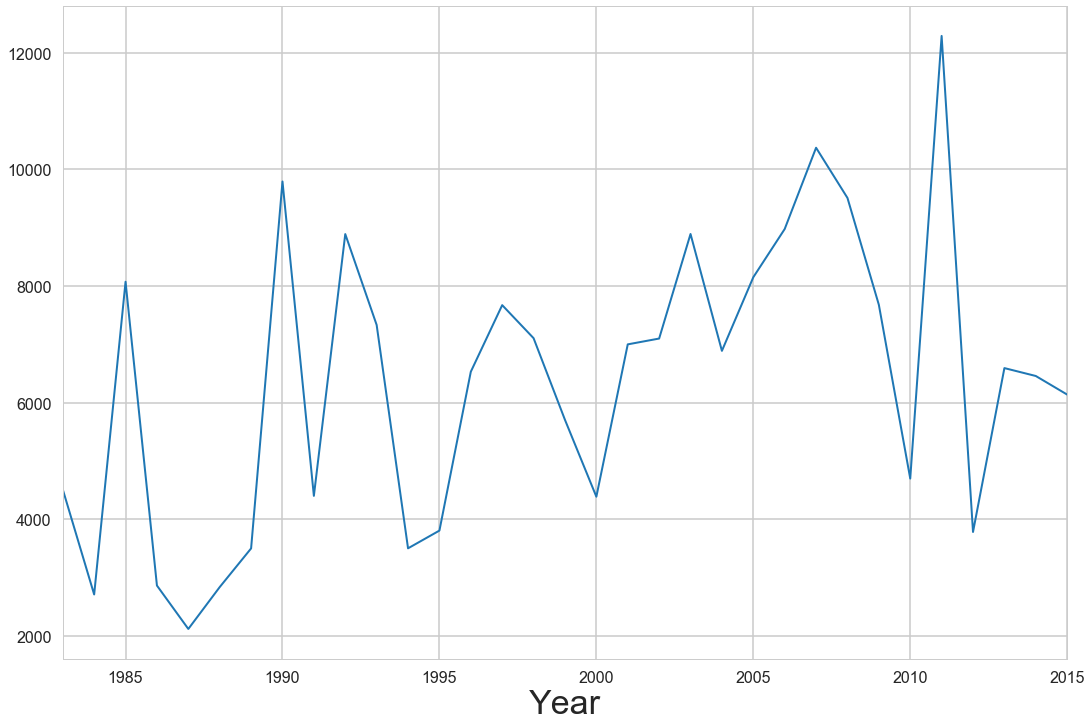

In [33]:
(gdf['TP_load']*1e-9*40*0.5).plot()

In [7]:
gdf.head()

,Month,Day,GlobalRadiation,CloudCover,AirTemperature,RelativeHumidity,AirPressure,WindSpeed,Precipitation,InflowQ,InflowT,InflowC,POC,InflowTP,InflowDOP,InflowChla,DOC,DIC,O,NO3,NH4,SO4,Fe2,Ca2,pH,CH4aq,Fe3,Al3,FeS,CaCO3,CH4g,POP
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1983,8.007273,15.781818,NaN,0.636996,12.173143,75.859727,1016.211803,5.252413,3.088909,1.458701e+07,9.504436,0.1,100.0,31.137091,5.555954,0.1,5.555954,0.0,15000.0,5000.0,0.0,20000.0,0.0,50.0,7.0,0.0,3.151674,26.001313,0.0,1000.0,0.0,25.581137
1984,6.513661,15.756831,NaN,0.673497,8.946765,78.636510,1017.503898,5.145504,2.759973,1.268852e+07,7.235683,0.1,100.0,30.329781,5.359744,0.1,5.359744,0.0,15000.0,5000.0,0.0,20000.0,0.0,50.0,7.0,0.0,5.366459,44.273287,0.0,1000.0,0.0,24.970038
1985,6.526027,15.720548,NaN,0.634953,8.663882,75.324897,1016.886250,5.581739,2.975068,1.456152e+07,6.280192,0.1,100.0,31.638630,5.529495,0.1,5.529495,0.0,15000.0,5000.0,0.0,20000.0,0.0,50.0,7.0,0.0,6.139268,50.648962,0.0,1000.0,0.0,26.109135
1986,6.526027,15.720548,NaN,0.647060,9.152689,78.709452,1017.471171,5.039738,2.904384,1.525158e+07,6.602877,0.1,100.0,31.098082,5.539498,0.1,5.539498,0.0,15000.0,5000.0,0.0,20000.0,0.0,50.0,7.0,0.0,5.845526,48.225592,0.0,1000.0,0.0,25.558585
1987,6.526027,15.720548,NaN,0.659192,10.046508,77.288219,1015.463027,5.427381,2.681096,7.093775e+06,6.037233,0.1,100.0,35.738630,6.450495,0.1,6.450495,0.0,15000.0,5000.0,0.0,20000.0,0.0,50.0,7.0,0.0,7.790723,64.273467,0.0,1000.0,0.0,29.288135
